# Mining Challenge Sample Notebook

This notebook gives a small example of working with our data.

## Imports and Database Connection

In [2]:
import re
from mongoengine import connect, disconnect
from pycoshark.mongomodels import Project, VCSSystem, Commit, FileAction, Hunk, Refactoring, IssueSystem, Issue, IssueComment, MailingList, Message,PullRequestSystem
from pycoshark.utils import create_mongodb_uri_string


# You may have to update this dict to match your DB credentials
disconnect()
credentials = {'db_user': '',
               'db_password': '',
               'db_hostname': 'localhost',
               'db_port': 27017,
               'db_authentication_database': '',
               'db_ssl_enabled': False}

uri = create_mongodb_uri_string(**credentials)

connect('smartshark_2_1', host=uri, alias='default')

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, read_preference=Primary())

In [3]:
projects = Project.objects.all()
print(projects.count())

commit_id = []
project = Project.objects(name='giraph').get()

for fa in FileAction.objects.all():
    if fa.induces != []:
        for i in fa.induces:
                commit = Commit.objects(id=fa.commit_id).get()
                vcs_system = VCSSystem.objects(id=commit.vcs_system_id, project_id=project.id)
                if vcs_system and commit.id not in commit_id:
                    commit_id.append(commit.id)
                    print(commit.id)

print("Number of total bug inducing commits: " + str(len(commit_id)))

77
5bf51c32d2f8190d97f3bae4
5bf51c32d2f8190da7f3bae4
5bf51c33d2f8190d8bf3baee
5bf51c34d2f8190d87f3bafa
5bf51c36d2f8190da1f3bb04
5bf51c35d2f8190da5f3bafe
5bf51c37d2f8190dadf3bb0d
5bf51c37d2f8190d88f3bb0c
5bf51c3ad2f8190d8bf3bb1a
5bf51c3bd2f8190d9bf3bb36
5bf51c3cd2f8190d85f3bb5c
5bf51c3cd2f8190d87f3bb42
5bf51c3bd2f8190d8df3bb37
5bf51c3bd2f8190d88f3bb40
5bf51c3cd2f8190d97f3bb60
5bf51c3dd2f8190d99f3bb5c
5bf51c3cd2f8190d87f3bb4d
5bf51c3dd2f8190d94f3bb68
5bf51c3bd2f8190dadf3bb3c
5bf51c3ed2f8190d89f3bbcf
5bf51c3fd2f8190d8bf3bb9f
5bf51c3dd2f8190d8df3bb5e
5bf51c3fd2f8190da1f3bb99
5bf51c3fd2f8190d85f3bb95
5bf51c3ed2f8190d88f3bb8d
5bf51c40d2f8190d89f3bbf5
5bf51c40d2f8190d9bf3bb85
5bf51c3dd2f8190da7f3bb67
5bf51c40d2f8190d85f3bb9e
5bf51c3fd2f8190d93f3bba4
5bf51c43d2f8190d85f3bbe6
5bf51c42d2f8190d89f3bc24
5bf51c40d2f8190d9bf3bb8b
5bf51c3fd2f8190d94f3bba2
5bf51c41d2f8190da1f3bbe8
5bf51c43d2f8190da7f3bc20
5bf51c44d2f8190d87f3bc2f
5bf51c44d2f8190d8af3bc2d
5bf51c45d2f8190d8ff3bc91
5bf51c47d2f8190d90f3bc

5bf51c99d2f8190d94f3c31c
5bf51c99d2f8190d97f3c3eb
5bf51c9ad2f8190d8bf3c3dc
5bf51c99d2f8190d99f3c473
5bf51c9ad2f8190d85f3c3be
5bf51c9ad2f8190d87f3c382
5bf51c9ad2f8190d99f3c47c
5bf51c9bd2f8190d85f3c3cc
5bf51c9cd2f8190d87f3c394
5bf51c9cd2f8190d88f3c40d
5bf51c9ad2f8190d89f3c459
5bf51c9bd2f8190d9df3c3f2
5bf51c9cd2f8190d93f3c42d
5bf51c9cd2f8190da1f3c488
5bf51c9cd2f8190d87f3c39d
5bf51c9cd2f8190d8df3c3e7
5bf51c9ed2f8190d88f3c424
5bf51c9ed2f8190d89f3c484
5bf51c9fd2f8190d85f3c3f5
5bf51c9fd2f8190d88f3c431
5bf51c9fd2f8190d9df3c41b
5bf51ca0d2f8190d88f3c43b
5bf51c9fd2f8190d89f3c48d
5bf51c9fd2f8190d8af3c54f
5bf51ca2d2f8190d97f3c4c7
5bf51ca2d2f8190d8bf3c42a
5bf51ca0d2f8190d8df3c40c
5bf51ca1d2f8190d88f3c458
5bf51ca2d2f8190d89f3c4c9
5bf51ca2d2f8190d8af3c573
5bf51ca4d2f8190d9ef3c703
5bf51ca6d2f8190d85f3c423
5bf51ca6d2f8190d8bf3c463
5bf51ca5d2f8190dadf3c4dc
5bf51ca7d2f8190d88f3c491
5bf51ca8d2f8190d97f3c4fc
5bf51ca7d2f8190d99f3c535
5bf51ca7d2f8190d9df3c458
5bf51ca8d2f8190d9ef3c72b
5bf51ca9d2f8190d88f3c4a7


KeyboardInterrupt: 

In [39]:
from pycoshark.mongomodels import PullRequest, PullRequestCommit

my_dict = []

print("Number of total bug inducing commits in giraph: " + str(len(commit_id)))
pull_request_system = PullRequestSystem.objects(project_id=project.id).get()
pr = PullRequest.objects(pull_request_system_id=pull_request_system.id)
print("Number of pull-request in the project: " + str(pr.count()))

for item in pr:
    pr_commit = PullRequestCommit.objects(pull_request_id=item.id)
    for value in pr_commit:
        if value.commit_id in commit_id:
            
            for key in my_dict:
                if key["pull_request"] == item.id:
                    key["commit_count"] += 1
            else:
                dict = {"pull_request":item.id,
                       "commit_count": 1,
                       "time_difference": item.updated_at - item.created_at}
                my_dict.append(dict)
                                             


print(len(my_dict))
        

Number of total bug inducing commits in giraph: 427
Number of pull-request in the project: 146
48


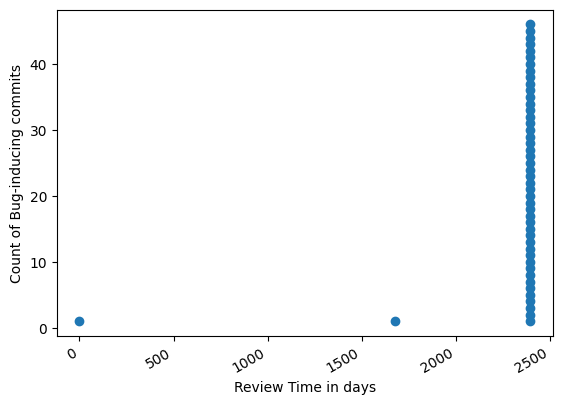

In [40]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np

x = []
y = []
for item in my_dict:
    x.append(item["time_difference"].days)
    y.append(item["commit_count"])

plt.scatter(x,y)    
plt.gcf().autofmt_xdate()
plt.xlabel("Review Time in days")
plt.ylabel("Count of Bug-inducing commits")
plt.show()
    

## Working with commits

In [26]:
# We first need the the project from the database
project = Project.objects(name='commons-math').get()

# We now select the version control system of the project
vcs_system = VCSSystem.objects(project_id=project.id).get()


print('VCS System:', vcs_system.url)

# We can now fetch the commits and analyze them
num_commits = Commit.objects(vcs_system_id=vcs_system.id).count()

print('Number of commits:', num_commits)

count_bugfix = 0
count_linked_issue = 0
count_hunks = 0
count_refactorings_refdiff = 0
count_refactorings_refactoringminer = 0

# Only limits the fields we are reading to the required fields. This is important for the performance.
for commit in Commit.objects(vcs_system_id=vcs_system.id).only('labels', 'linked_issue_ids'):
    if commit.labels is not None and 'validated_bugfix' in commit.labels and commit.labels['validated_bugfix']==True:
        count_bugfix += 1
    if commit.linked_issue_ids is not None and len(commit.linked_issue_ids)>0:
        count_linked_issue += 1
        
    # File actions group all changed hunks in a commit of the same file
    for fa in FileAction.objects(commit_id=commit.id):
        count_hunks += Hunk.objects(file_action_id=fa.id).count()
        
    count_refactorings_refdiff += Refactoring.objects(commit_id=commit.id, detection_tool='"refDiff"').count()
    count_refactorings_refactoringminer += Refactoring.objects(commit_id=commit.id, detection_tool='rMiner').count()

        
print('Number of bug fixing commits:', count_bugfix)
print('Number of commits that link to a Jira issue:', count_linked_issue)
print('Number of hunks for all commits:', count_hunks)
print('Number of refactorings detected by refDiff:', count_refactorings_refdiff)
print('Number of refactorings detected by RefactoringMiner:', count_refactorings_refactoringminer)

VCS System: https://github.com/apache/commons-math
Number of commits: 7222
Number of bug fixing commits: 396
Number of commits that link to a Jira issue: 2124
Number of hunks for all commits: 147433
Number of refactorings detected by refDiff: 0
Number of refactorings detected by RefactoringMiner: 14042


## Working with issues

In [27]:
# We first need the the project from the database
project = Project.objects(name='giraph').get()

# We now select the issue tracking system of the project
# Please note that some projects have multiple issue trackers
# In this case get() would fail and you would need to loop over them
issue_tracker = IssueSystem.objects(project_id=project.id).get()

print('Issue Tracker:', issue_tracker.url)

# we can now work with the issues
num_issues = Issue.objects(issue_system_id=issue_tracker.id).count()

print('Number of issues:', num_issues)

count_comments = 0
count_referenced_by_commits = 0
count_bugs_dev_label = 0
count_bugs_validated = 0

for issue in Issue.objects(issue_system_id=issue_tracker.id):
    count_comments += IssueComment.objects(issue_id=issue.id).count()
    if issue.issue_type is not None and issue.issue_type.lower()=='bug':
        count_bugs_dev_label += 1
    if issue.issue_type_verified is not None and issue.issue_type_verified.lower()=='bug':
        count_bugs_validated += 1
    if Commit.objects(linked_issue_ids=issue.id).count()>0:
        count_referenced_by_commits += 1
        
print('Number of comments in discussions:', count_comments)
print('Number of issues referenced by commits:', count_referenced_by_commits)
print('Number of issues labeled as bugs by developers:', count_bugs_dev_label)
print('Number of issues labeled validated as bug by researchers:', count_bugs_validated)

Issue Tracker: https://issues.apache.org/jira/rest/api/2/search?jql=project=GIRAPH
Number of issues: 1232
Number of comments in discussions: 6759
Number of issues referenced by commits: 787
Number of issues labeled as bugs by developers: 534
Number of issues labeled validated as bug by researchers: 140


## Working with the Mailing List

In [4]:
# We first need the the project from the database
project = Project.objects(name='giraph').get()

# We now select the mailing list of the project
# Since we have two mailing lists, we need to loop over them
mailing_lists = MailingList.objects(project_id=project.id)
for mailing_list in mailing_lists:
    print('Mailing List:', mailing_list.name)

    # We can now access the messages
    count_emails = Message.objects(mailing_list_id=mailing_list.id).count()

    print('Number of Emails:', count_emails)

    count_references_jira = 0
    
    jira_id = re.compile('GIRAPH-[0-9]+', re.I | re.M)
    for message in Message.objects(mailing_list_id=mailing_list.id):
        if message.body is not None and jira_id.search(message.body):
            count_references_jira += 1
            
    print('Number of emails that reference a Jira issue:', count_references_jira)

Mailing List: http://mail-archives.apache.org/mod_mbox/giraph-dev
Number of Emails: 12872
Number of emails that reference a Jira issue: 10750
Mailing List: http://mail-archives.apache.org/mod_mbox/giraph-user
Number of Emails: 3742
Number of emails that reference a Jira issue: 902
